In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

In [2]:
lst = pd.read_csv("listings.csv")
cal = pd.read_csv("calendar.csv")
rev = pd.read_csv("reviews.csv")

# replace the missing values with np.nan to ensure they are coded correctly.
lst.fillna(np.nan, inplace=True)
cal.fillna(np.nan, inplace=True)
rev.fillna(np.nan, inplace=True)

Need to write a function that will tell me basics about each file in terms of:
- display the head info for each dataframe
- number of rows and columns
- which features have only one value (these could be dropped)
- which features are categorical vs numeric
- basic statistics about the numeric features
- unique values of the categorical features
- info relating to the missing data including how many features have missing data, proportion of missing by feature

In [3]:
def describe_data(df, csv_name):
    dash = '-' * 70
    newline = '\n' * 3
    df_len = len(df)
    
    # head info
    print(f'{dash}Head Information for {csv_name}{dash}')
    display(df.head())
    
    # basic shape and stats
    print(newline)
    print(f'{dash}Basic Shape Information for {csv_name}{dash}')
    print(f'{csv_name} contains {df.shape[0]:,} rows and {df.shape[1]:,} columns.')
    
    # find columns with just one value, these can be dropped
    drop_columns = []
    for col in df:
        if len(df[col].unique()) == 1:
            drop_columns.append(col)
    
    print(newline)
    print(f'The following columns only contain one value and can be dropped: {", ".join(drop_columns)}')
    
    # list the numeric columns
    numeric_cols = df.select_dtypes(include='number').columns
    print(newline)
    print(f'These columns are numeric: {", ".join(numeric_cols)}')
    
    # print descriptive statistics for dataframe
    print(newline)
    print(f'{dash}Basic statistics for {csv_name}{dash}')
    with pd.option_context('display.max_columns', None):
        display(df.describe())
        
    print(newline)
    print(f'{dash}Histograme of numeric features {csv_name}{dash}')
    df.hist(figsize=(20,10));
    plt.tight_layout()
    plt.show(plt.gcf())
    
    
    # print numeric info
    print(newline)
   # print(f'{dash}First 5 top values with counts for each non-numeric feature {csv_name}{dash}')
    for col in df[numeric_cols]:
        num_na = df[col].isna().sum()
        num_filled = df_len - num_na
        proportion_na = num_na / df_len        
        col_mean = df[col].mean()
        col_median = df[col].median()
        print(f'{df[col].name}|| mean: {col_mean:,.0f}   median: {col_median:,.0f}   Not_NA: {num_filled:,.0f}   NA: {num_na:,.0f} proportion_NA: {proportion_na:.1%}\n')
    
    
    
    # get general info on non-numeric features
    non_numeric_cols = df.select_dtypes(exclude='number').columns
    print(newline)
    print(f'These columns are non-numeric dtypes: {", ".join(non_numeric_cols)}')
    
    print(newline)
    print(f'{dash}First 5 top values with counts for each non-numeric feature {csv_name}{dash}')
    for col in df[non_numeric_cols]:
        # get count info about column
        num_unique = len(df[col].unique())
        num_na = df[col].isna().sum()
        num_filled = df_len - num_na
        proportion_na = num_na / df_len        
        
        # get info about top values
        names = list(df[col].value_counts()[0:5].index)
        sliced_names = [str(name)[:25] for name in names]
        values = list(df[col].value_counts()[0:5])
        print(f'{df[col].name}: {list(zip(sliced_names,values))}')
        print(f'num_unique: {num_unique:,.0f}   not_NA: {num_filled:,.0f}   NA: {num_na:,.0f}   proportion_NA: {proportion_na:.1%}\n')
        
        
    # More information about missing data
    print(newline)
    print(f'{dash}More information about missing data for {csv_name}{dash}')
    
    # visualize how many rows per column have null values.
    missing_data = df.isna().sum(axis=0)

    plt.figure(figsize=(7,20))
    sns.barplot(y=missing_data.index,
                x=missing_data.values,
                color='blue'
               );
    plt.xticks(rotation=45);
    plt.title('Count of Missing Values in Dataframe by column');
    plt.show(plt.gcf())
    
    #show column missing data as a histogram
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.ecdfplot(missing_data, ax=axs[1]);
    sns.histplot(x=missing_data, ax=axs[0], stat='probability');
    axs[0].set_xlabel('Number of missing values per column')
    axs[0].set_ylabel('Proportion of column')
    axs[1].set_xlabel('Number of missing values per column')
    axs[1].set_ylabel('Proportion of columns')
    axs[1].set_yticks(list(np.arange(0.0,1.1,0.1)));
    plt.suptitle('Histogram & Cumulative distribution of number of missing values per column');
    plt.show(plt.gcf())
    
    # How much data is missing in each row of the dataset?
    missing_row = df.isna().sum(axis=1) 

    # plot a histogram cumulative distribution function to visualize the data
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.ecdfplot(missing_row, ax=axs[1]);
    sns.histplot(x=missing_row, ax=axs[0], stat='probability');
    plt.xticks(rotation=45);
    axs[0].set_xlabel('Number of missing values per row')
    axs[0].set_ylabel('Proportion of rows')
    axs[1].set_xlabel('Number of missing values per row')
    axs[1].set_ylabel('Proportion of rows')
    axs[1].set_yticks(list(np.arange(0.0,1.1,0.1)));
    plt.suptitle('Histogram & Cumulative distribution of number of missing values per row');
    plt.show(plt.gcf())
    print(newline)
    
    return drop_columns, numeric_cols, non_numeric_cols

Now each data set can be explore

----------------------------------------------------------------------Head Information for listings.csv----------------------------------------------------------------------


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89






----------------------------------------------------------------------Basic Shape Information for listings.csv----------------------------------------------------------------------
listings.csv contains 3,818 rows and 92 columns.




The following columns only contain one value and can be dropped: scrape_id, last_scraped, experiences_offered, market, country_code, country, has_availability, calendar_last_scraped, requires_license, license, jurisdiction_names




These columns are numeric: id, scrape_id, host_id, host_listings_count, host_total_listings_count, latitude, longitude, accommodates, bathrooms, bedrooms, beds, square_feet, guests_included, minimum_nights, maximum_nights, availability_30, availability_60, availability_90, availability_365, number_of_reviews, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, license, calculated_host_listings_count, reviews

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000






----------------------------------------------------------------------Histograme of numeric features listings.csv----------------------------------------------------------------------


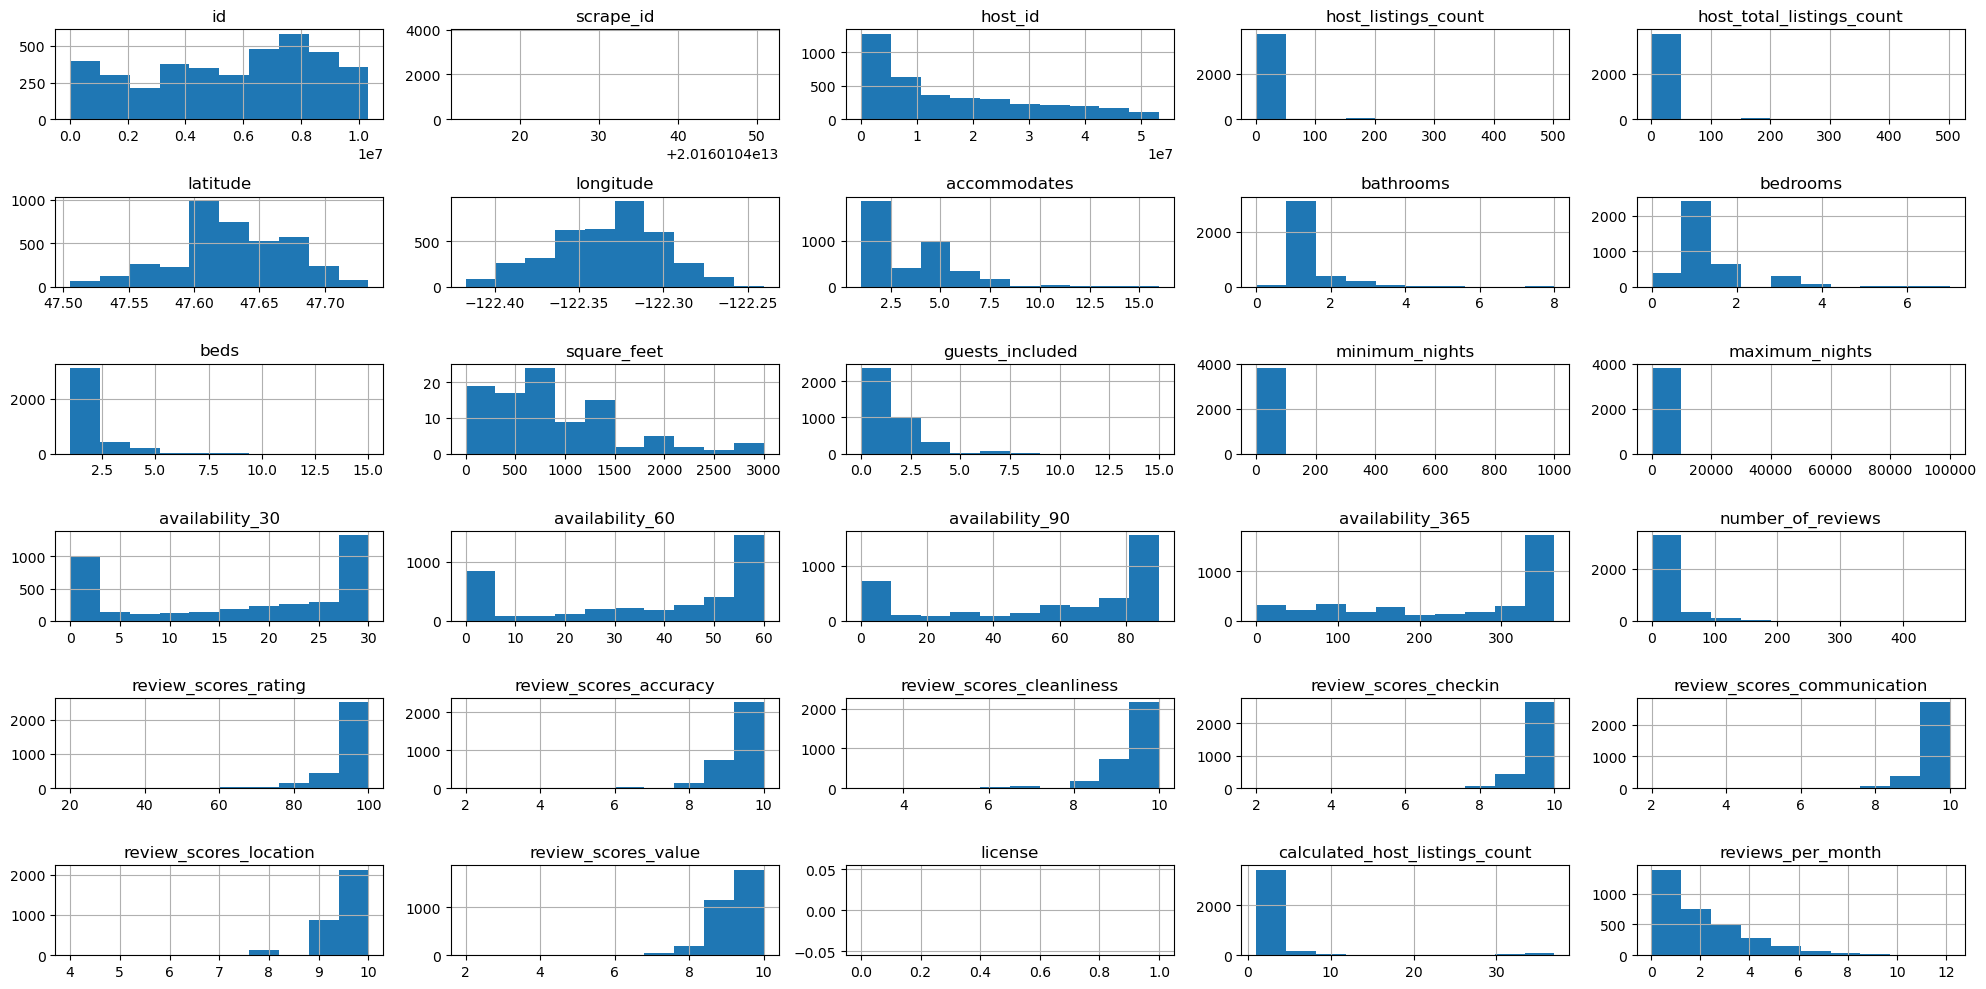





id|| mean: 5,550,111   median: 6,118,244   Not_NA: 3,818   NA: 0 proportion_NA: 0.0%

scrape_id|| mean: 20,160,104,002,432   median: 20,160,104,002,432   Not_NA: 3,818   NA: 0 proportion_NA: 0.0%

host_id|| mean: 15,785,555   median: 10,558,142   Not_NA: 3,818   NA: 0 proportion_NA: 0.0%

host_listings_count|| mean: 7   median: 1   Not_NA: 3,816   NA: 2 proportion_NA: 0.1%

host_total_listings_count|| mean: 7   median: 1   Not_NA: 3,816   NA: 2 proportion_NA: 0.1%

latitude|| mean: 48   median: 48   Not_NA: 3,818   NA: 0 proportion_NA: 0.0%

longitude|| mean: -122   median: -122   Not_NA: 3,818   NA: 0 proportion_NA: 0.0%

accommodates|| mean: 3   median: 3   Not_NA: 3,818   NA: 0 proportion_NA: 0.0%

bathrooms|| mean: 1   median: 1   Not_NA: 3,802   NA: 16 proportion_NA: 0.4%

bedrooms|| mean: 1   median: 1   Not_NA: 3,812   NA: 6 proportion_NA: 0.2%

beds|| mean: 2   median: 1   Not_NA: 3,817   NA: 1 proportion_NA: 0.0%

square_feet|| mean: 855   median: 750   Not_NA: 97   NA: 3,

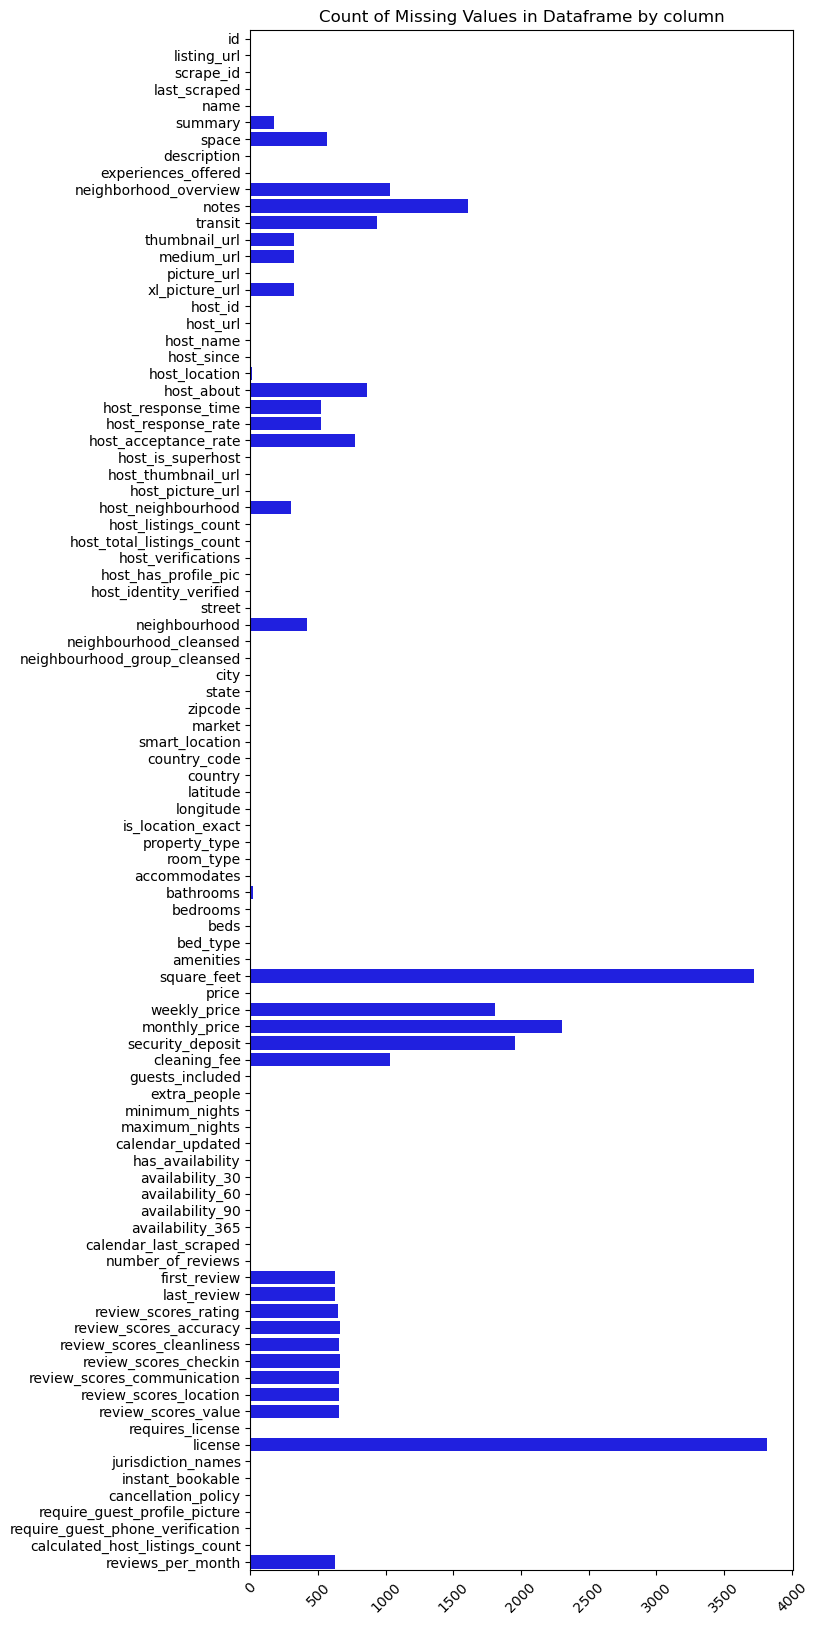

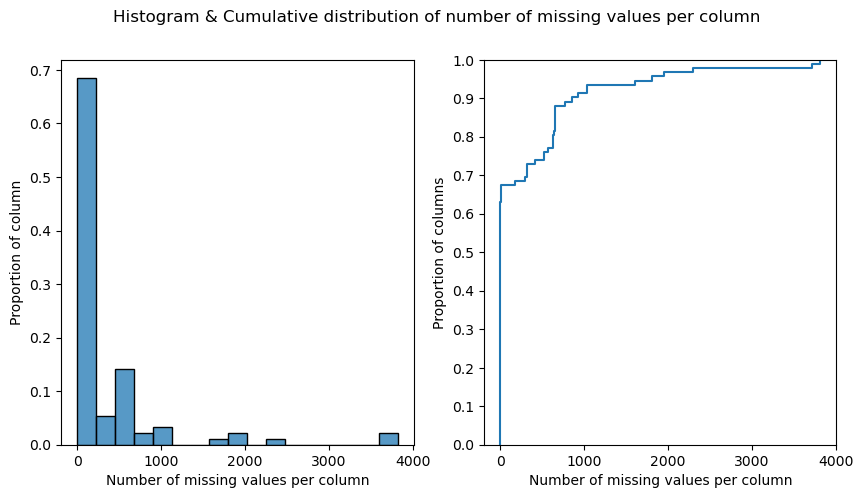

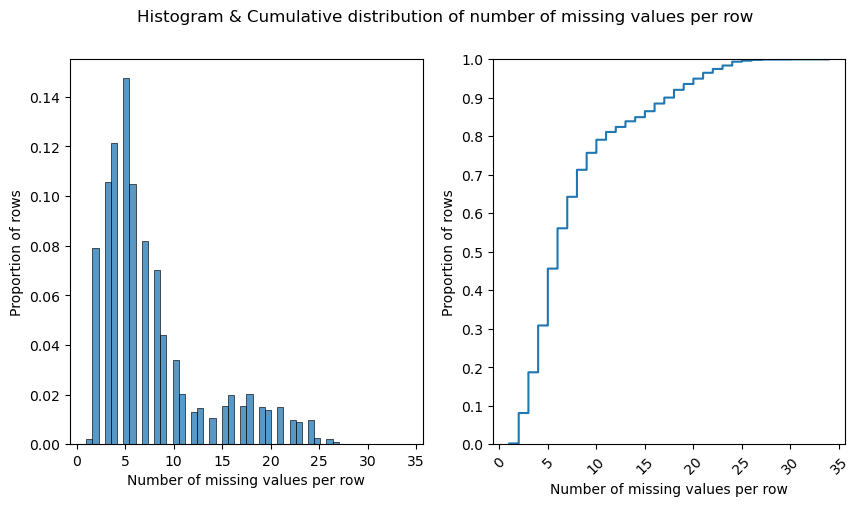





----------------------------------------------------------------------Head Information for calendar.csv----------------------------------------------------------------------


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN






----------------------------------------------------------------------Basic Shape Information for calendar.csv----------------------------------------------------------------------
calendar.csv contains 1,393,570 rows and 4 columns.




The following columns only contain one value and can be dropped: 




These columns are numeric: listing_id




----------------------------------------------------------------------Basic statistics for calendar.csv----------------------------------------------------------------------


,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07






----------------------------------------------------------------------Histograme of numeric features calendar.csv----------------------------------------------------------------------


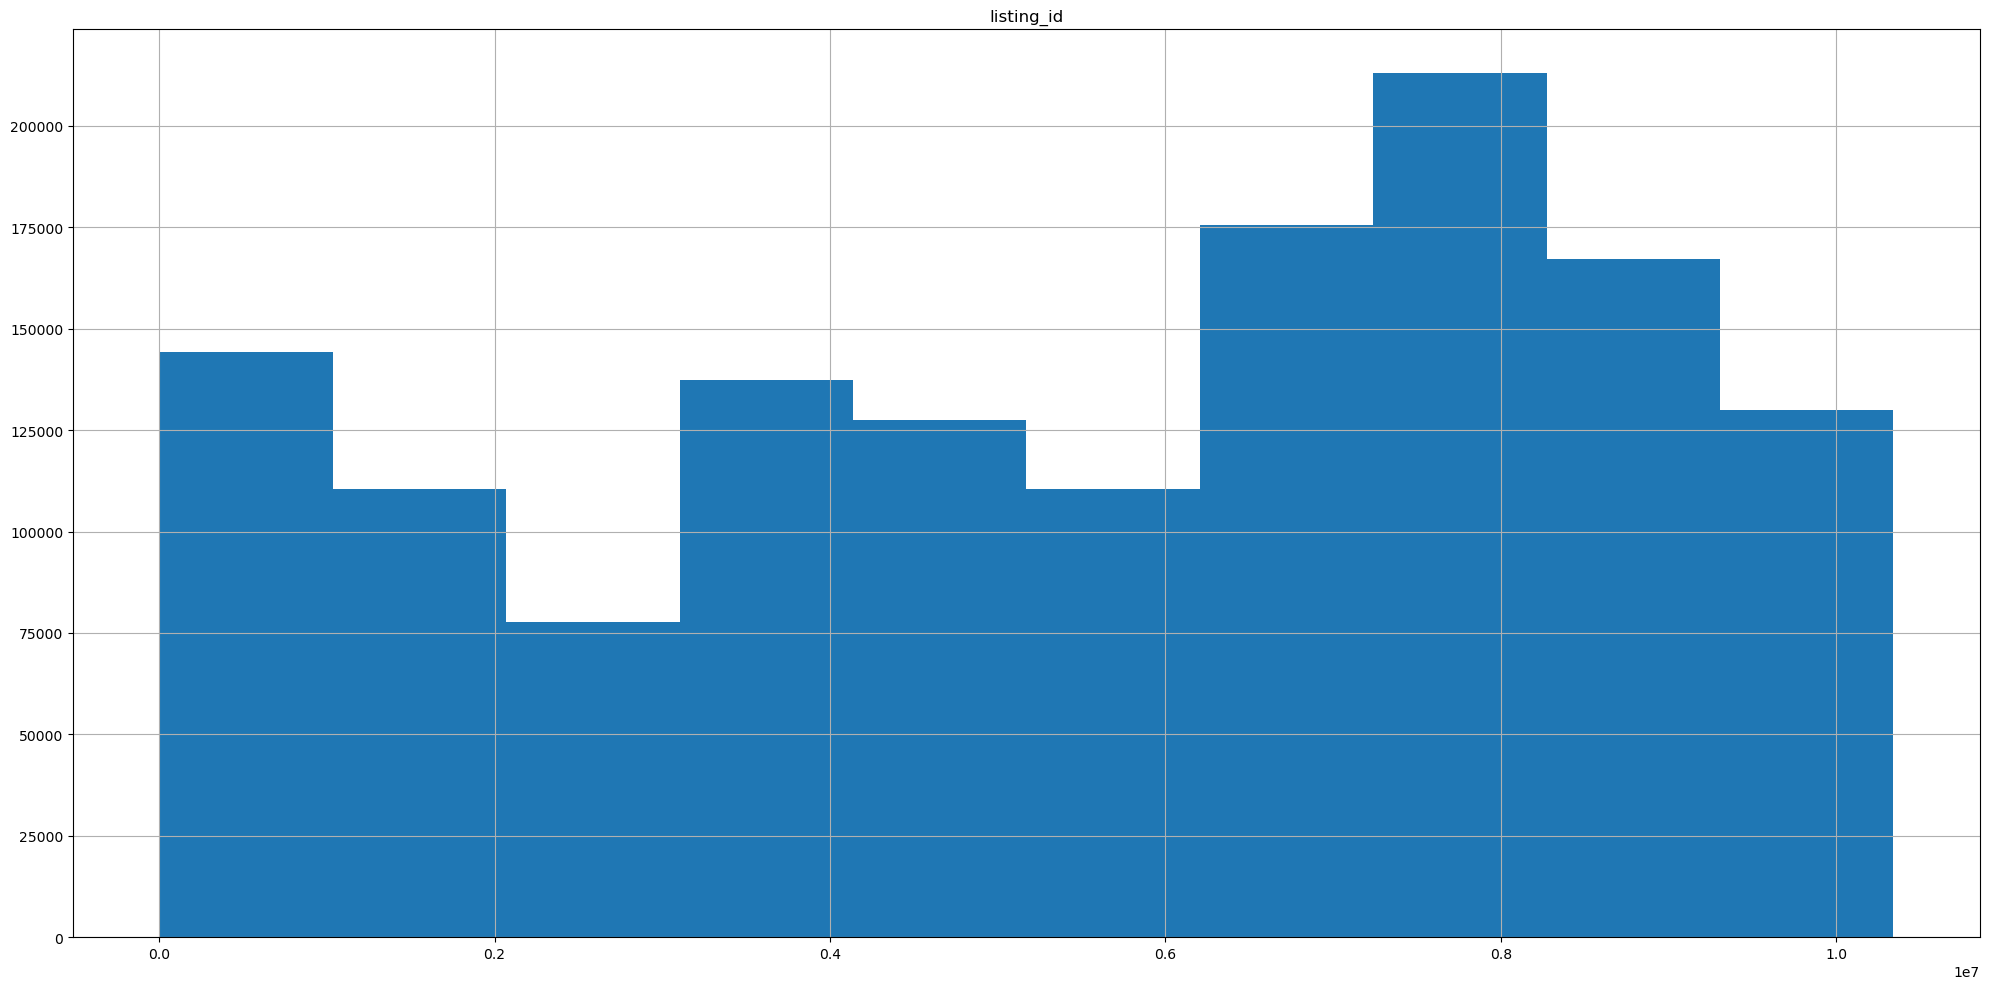





listing_id|| mean: 5,550,111   median: 6,118,244   Not_NA: 1,393,570   NA: 0 proportion_NA: 0.0%





These columns are non-numeric dtypes: date, available, price




----------------------------------------------------------------------First 5 top values with counts for each non-numeric feature calendar.csv----------------------------------------------------------------------
date: [('2016-01-04', 3818), ('2016-09-11', 3818), ('2016-09-09', 3818), ('2016-09-08', 3818), ('2016-09-07', 3818)]
num_unique: 365   not_NA: 1,393,570   NA: 0   proportion_NA: 0.0%

available: [('t', 934542), ('f', 459028)]
num_unique: 2   not_NA: 1,393,570   NA: 0   proportion_NA: 0.0%

price: [('$150.00', 36646), ('$100.00', 31755), ('$75.00', 29820), ('$125.00', 27538), ('$65.00', 26415)]
num_unique: 670   not_NA: 934,542   NA: 459,028   proportion_NA: 32.9%





----------------------------------------------------------------------More information about missing data for calendar.csv---------------------

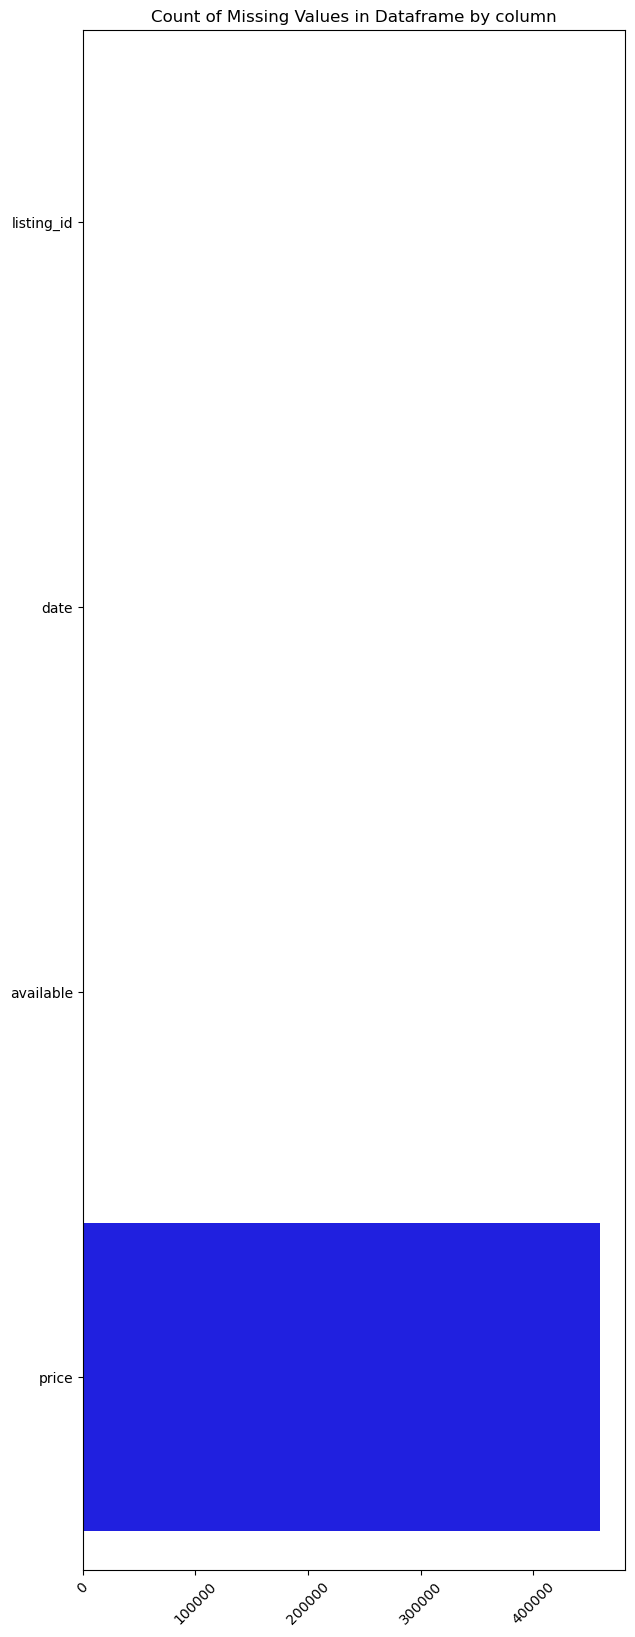

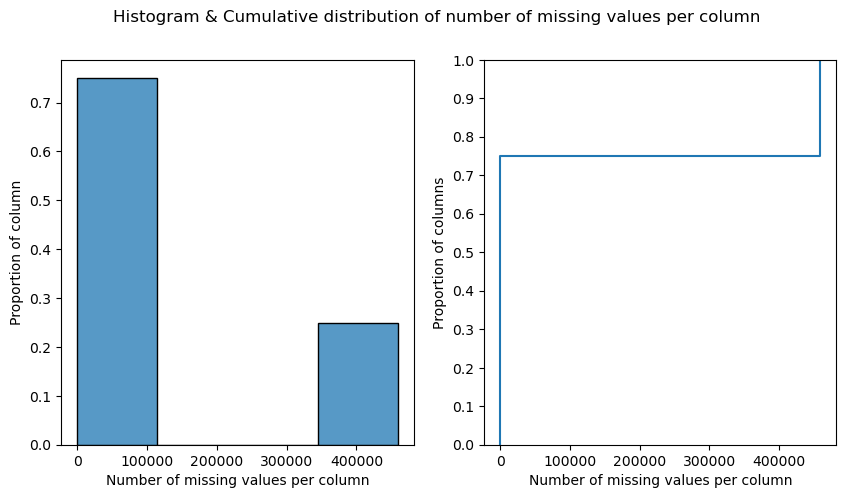

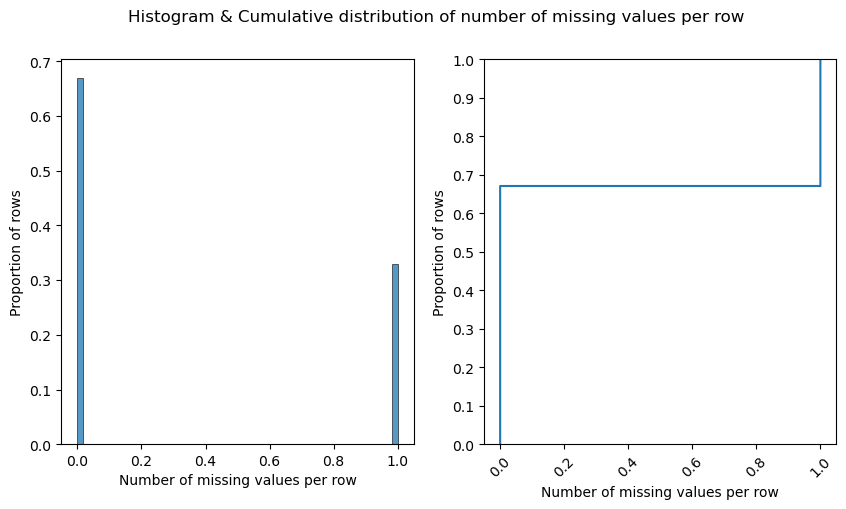





----------------------------------------------------------------------Head Information for reviews.csv----------------------------------------------------------------------


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...






----------------------------------------------------------------------Basic Shape Information for reviews.csv----------------------------------------------------------------------
reviews.csv contains 84,849 rows and 6 columns.




The following columns only contain one value and can be dropped: 




These columns are numeric: listing_id, id, reviewer_id




----------------------------------------------------------------------Basic statistics for reviews.csv----------------------------------------------------------------------


,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07






----------------------------------------------------------------------Histograme of numeric features reviews.csv----------------------------------------------------------------------


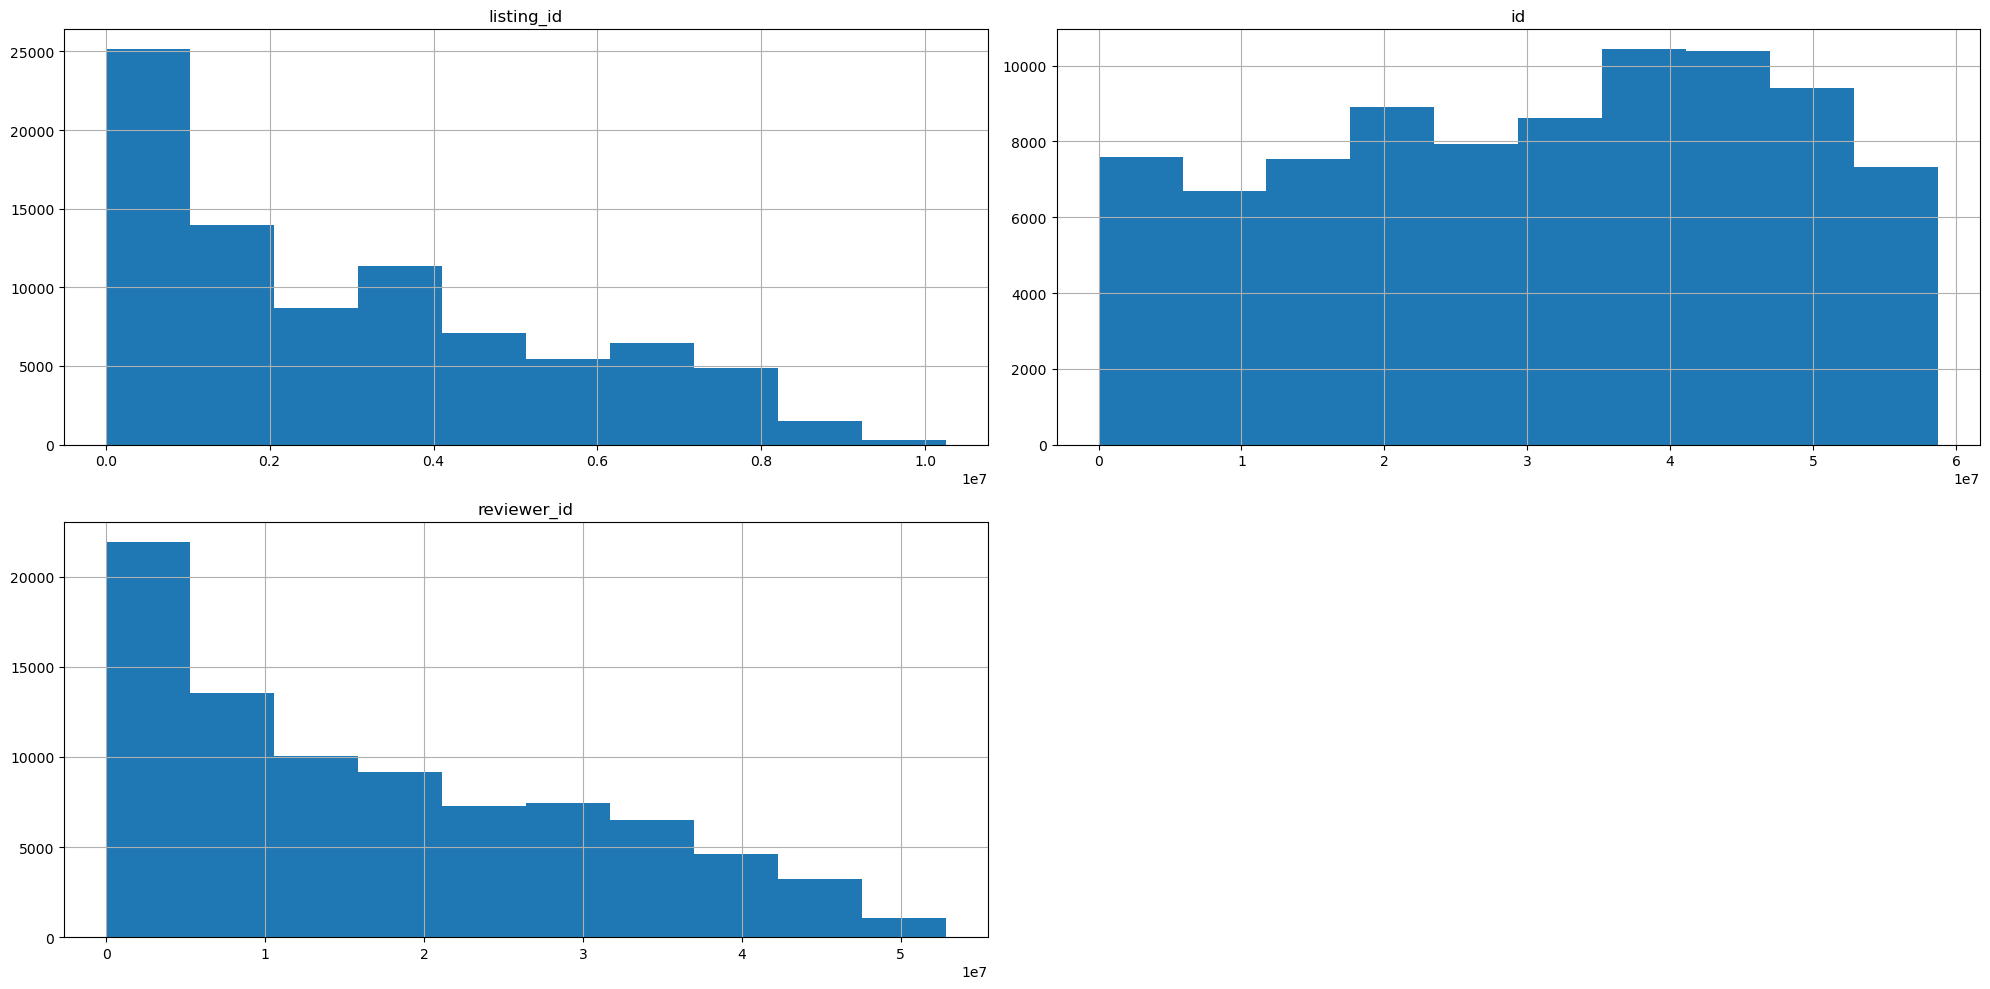





listing_id|| mean: 3,005,067   median: 2,488,228   Not_NA: 84,849   NA: 0 proportion_NA: 0.0%

id|| mean: 30,587,645   median: 32,288,093   Not_NA: 84,849   NA: 0 proportion_NA: 0.0%

reviewer_id|| mean: 17,013,007   median: 14,134,759   Not_NA: 84,849   NA: 0 proportion_NA: 0.0%





These columns are non-numeric dtypes: date, reviewer_name, comments




----------------------------------------------------------------------First 5 top values with counts for each non-numeric feature reviews.csv----------------------------------------------------------------------
date: [('2015-09-21', 580), ('2015-08-07', 400), ('2015-09-07', 384), ('2015-08-10', 383), ('2015-08-31', 371)]
num_unique: 1,930   not_NA: 84,849   NA: 0   proportion_NA: 0.0%

reviewer_name: [('David', 870), ('Michael', 822), ('Sarah', 681), ('John', 608), ('Chris', 570)]
num_unique: 14,380   not_NA: 84,849   NA: 0   proportion_NA: 0.0%

comments: [('The host canceled this re', 57), ('The reservation was cance', 48), ('T

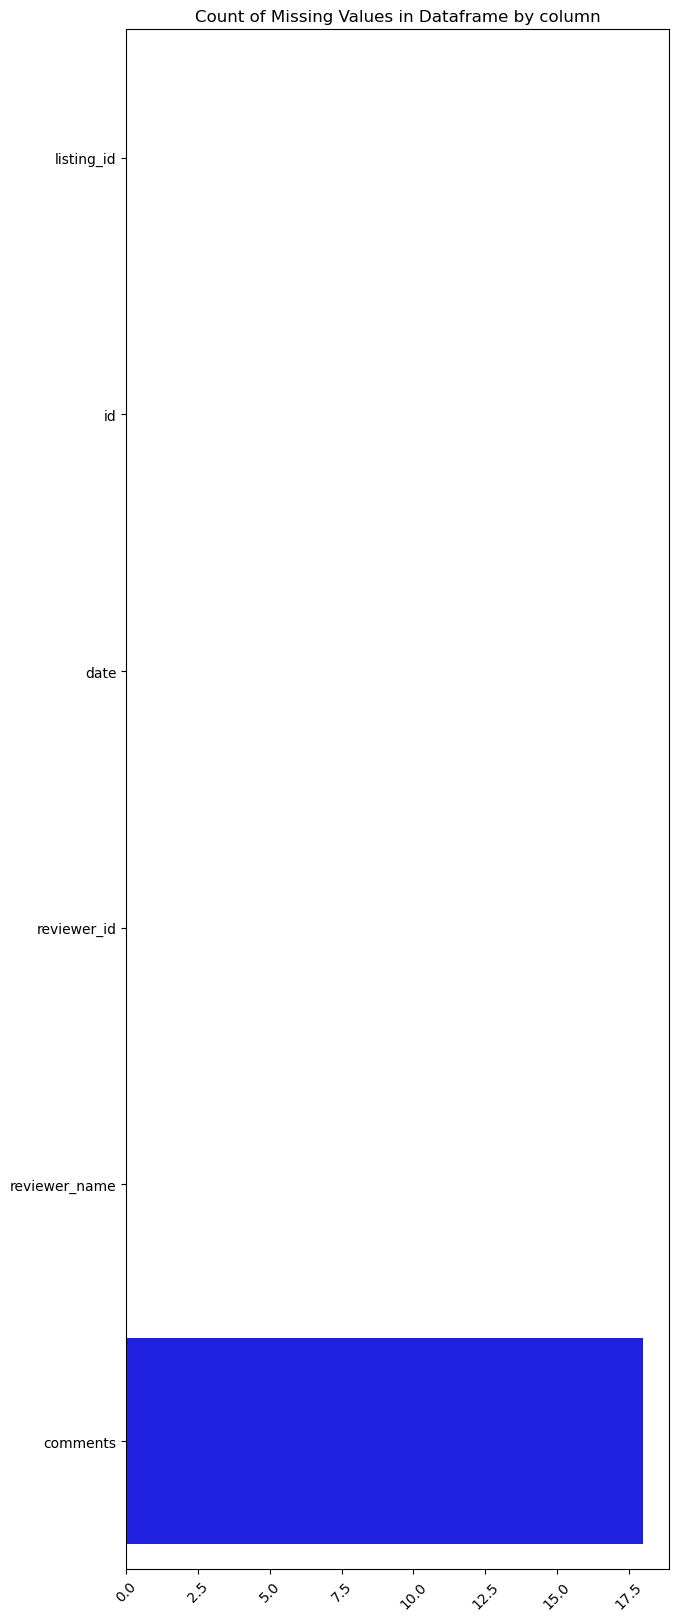

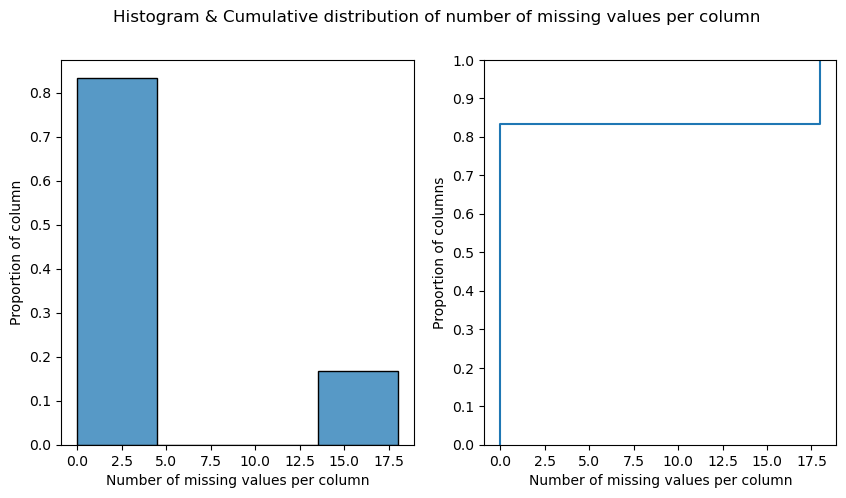

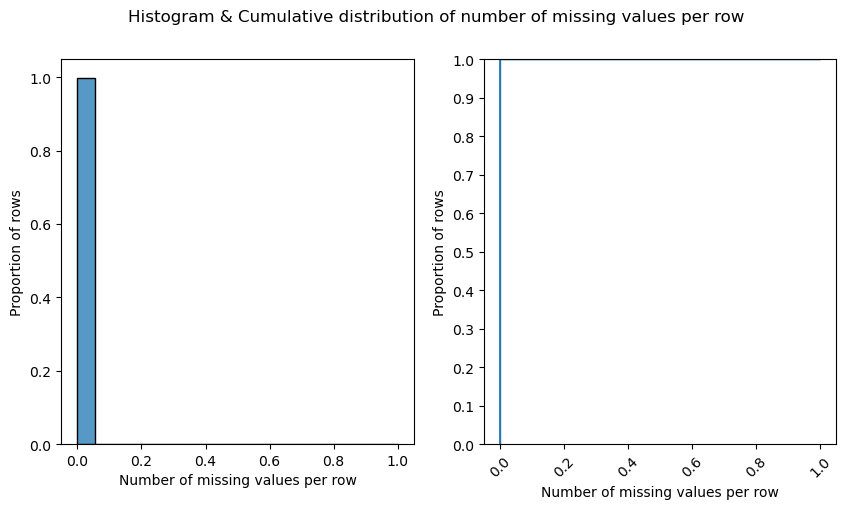

In [4]:
drop_columns_lst, numeric_cols_lst, non_numeric_cols_lst = describe_data(lst,"listings.csv")
drop_columns_cal, numeric_cols_cal, non_numeric_cols_cal = describe_data(cal,"calendar.csv")
drop_columns_rev, numeric_cols_rev, non_numeric_cols_rev = describe_data(rev,"reviews.csv")

# Cleaning the data
Now that that basic info can be seen for each dataframe, that information can be used to go through a few cleaning steps so that we can analyze the data

## Columns that can be dropped
There are several columns with only 1 value in the listings dataframe, these can be removed, the other dataframes don't contain such columns.  'state' can also be dropped as the values are all 'WA' or 'wa' which are just both Washington.

In [5]:
lst.drop(columns=drop_columns_lst, inplace=True)
lst.drop(columns=['state'], inplace=True)

## Transforming columns to the correct datatype

There are several columns that are dates or numeric (like cost) but are labeled as object type.  These need to be updated to the correct datatypes.  There are also some numeric columns that should be objects (like the ID field)

In [6]:
# used for converting dollars to floats
def convert_dollars(x):
    return float(x.replace(',','').replace('$',''))

In [7]:
# For lst, transform to object - id, host_id
lst[['id','host_id']] = lst[['id','host_id']].astype('object')

# For lst, transform to number - host_response_rate, host_acceptance_rate, price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people, 
lst['host_response_rate'] = lst['host_response_rate'].str.replace('%','').astype('float')/100
lst['host_acceptance_rate'] = lst['host_acceptance_rate'].str.replace('%','').astype('float')/100
lst[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']] = lst[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']].applymap(convert_dollars, na_action='ignore')

# For lst, transform to date - host_since,  first_review, last_review
lst[['host_since', 'first_review', 'last_review']] = lst[['host_since', 'first_review', 'last_review']].apply(pd.to_datetime)


# For lst, transform to bool - host_is_superhost, host_has_profile_pic, host_identity_verified, is_location_exact, instant_bookable, require_guest_profile_picture, require_guest_phone_verification
bool_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
lst[bool_cols] = lst[bool_cols].apply(lambda col: col.map({'t': True, 'f': False}))

In [8]:
# For cal, transform to object - listing_id
cal['listing_id'] = cal['listing_id'].astype('object')

# For cal, transform to number - price
cal[['price']] = cal[['price']].applymap(convert_dollars, na_action='ignore')

# For cal, transform to date - date
cal[['date']] = cal[['date']].apply(pd.to_datetime)

# For cal, transform to bool - available
cal[['available']] = cal[['available']].apply(lambda col: col.map({'t': True, 'f': False}))

In [9]:
# For rev, transform to object - listing_id, id, reviewer_id
rev[['listing_id', 'id', 'reviewer_id']] = rev[['listing_id', 'id', 'reviewer_id']].astype('object')

# For rev, transform to date - date
rev[['date']] = rev[['date']].apply(pd.to_datetime)


## Rename some fields that have the same name

So that it is more clear the column date will be updated so that it is clear which date is being referred to.

In [10]:
cal.rename(columns={'date': 'calendar_date'}, inplace=True)
rev.rename(columns={'date': 'review_date'}, inplace=True)

## Creating new variables

create dummy vars for sqft, break out the individual variables for columns such as amenities and experiences_offered(?), host_verifications

The column square_feet is missing 97.5% of it's values.  Therefore it might be more useful to just track which listings have square feet instead of the square feet itself.

In [11]:
# assign 0 if sqft missing and 1 if it exists, also assign 0 if sqft is listed as <100 sqft (as there are a handful of units with implausible sqft)
def map_sqft(x):
    if pd.isna(x) or x < 100:
        return 0
    else:
        return 1

lst['square_feet_flag'] = lst['square_feet'].apply(map_sqft)

# drop the sqft column and use the newly mapped column instead
lst.drop(columns=['square_feet'], inplace=True)


In [12]:
# create a function to expand columns like amenities and host_verifications, returns a dataframe of counts
def count_values_list(df, column_name, replacement_regex):
    
    df[column_name] = df[column_name].str.replace(replacement_regex, '', regex=True)
    df[column_name] = df[column_name].str.split(',')    
    
    # where not na, create a temp df with a 1 if the value is in the list or 0 otherwise
    temp_df = df.loc[~df[column_name].isna(), column_name].apply(lambda x: pd.Series(1, index=x)).fillna(0, downcast='int')
    temp_df = temp_df.add_prefix(column_name+'_')
    temp_df_columns = list(temp_df.columns)
    
    # df[column_name].str.join('|').str.get_dummies()
    # https://saturncloud.io/blog/how-to-convert-a-column-of-list-to-dummies-in-pandas/#:~:text=Converting%20a%20column%20of%20lists%20into%20dummy%20variables%20is%20a,machine%20learning%20and%20statistical%20modeling.
    
    #below snippet could be used if we needed to count the occurences
    # Group by index and sum to get counts
    #count_df = dummy_df.groupby(level=0).sum()
    # Merge the count DataFrame back to the original
    #result_df = df.join(count_df)
    
    # join in the counts to the original df
    df = df.join(temp_df) 
    
    # if the origianl column value was nan then fill with a 0
    df[temp_df_columns] = df[temp_df_columns].fillna(0) 
     
    # drop the original column and drop the empty column name as this is the same as nothing being provided
    df.drop(columns=[column_name, column_name+'_'], inplace=True)
    
    return df

In [13]:
lst = count_values_list(lst, 'amenities', r'[{}"]')
lst = count_values_list(lst, 'host_verifications', r'[\[\'\] ]')

No long form text anlsysis will be used, so for some text columns that are probably important (such as description), use description length instead of the text description itself

In [14]:
# handle for description length, nans would be zero.
# summary, space, description, neighborhood_overview, notes, transit, host_about

long_text_cols = ['summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'host_about']

text_len_df = pd.DataFrame()
for col in long_text_cols:
    text_len_df[col+'_len'] = lst[col].apply(lambda x: 0 if pd.isna(x) else len(x))
    
lst = lst.join(text_len_df)
lst.drop(columns=long_text_cols, inplace=True)

For links like thumbnail links or photo links, create new variables, 1 if exists or 0 otherwise, then drop the original columns

In [15]:
# transform link cols
link_cols = ['thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']

# create a temp dataframe and return 0 if nan or 1 otherwise, then rejoin to original dataframe and drop the columns
bool_df = pd.DataFrame()
for col in link_cols:
    bool_df[col+'_bool'] = lst[col].apply(lambda x: 0 if pd.isna(x) else 1)
    
lst = lst.join(bool_df)
lst.drop(columns=link_cols, inplace=True)

In [16]:
# Now these columns only contain 1 value and can be dropped picture_url_bool, host_url_bool, host_thumbnail_url_bool, host_picture_url_bool
lst.drop(columns=['picture_url_bool', 'host_url_bool', 'host_thumbnail_url_bool', 'host_picture_url_bool'], inplace=True)

In [17]:
# for simplicity, parse the host_location into two categories, those specifically in Seattle and those outside of seattle or not specific enough to determine
# True = Host location is specified as Seattle
# False = Host Location was outside seattle, or not enough info was given, or value was NA

host_location_new = lst['host_location'].str.contains('seattle', case=False, regex=False, na=False)
lst = lst.join(host_location_new, rsuffix='_seattle_tf')
lst.drop(columns=['host_location'], inplace=True)

## Handling missing data

After creating some new variables there are still columns with missing data, these need to be handled.

First handle numeric missing columns from the listings.  The numeric columns that need handling are host_total_listings_count, host_listings_count, bathrooms, bedrooms, beds, all the review scores, reviews_per_month, host_response_rate, host_acceptance_rate, weekly_price, monthly_price, security_deposit, and cleanijg

In [18]:
# handle remaining na lst numeric
# host_total_listings_count(x), host_listings_count(x), bathrooms(x), bedrooms(x), beds(x), 
# review_score(all), reviews_per_month
# host_response_rate, host_acceptance_rate, weekly_price, monthly_price, security_deposit,
# cleaning_fee

In [19]:
# host_listings_count and host_total_listings_count both are na for the same two rows, these two rows are also outliers
# regarding total number of missing values per row, so they are dropped
lst = lst.loc[~lst['host_listings_count'].isna()]

In [142]:
# write a function to fillna with most common value from anaother column

def fill_mode(df, col_to_fill, source_col):
    '''
    This function will look up in the source_col the most common (mode) response to values and use that to fill
    data in the col_to_fill.
    
    For example, if bathrooms (col_to_fill) is nan, use the most common number of bathrooms related to the guests_included (source_col)
    to estimate how many bathrooms there might be.  Fill the nan bathrooms with this number.  
    
    So if the most common number of bathrooms for 2 guests included is 1, then 1 will be used to fill the nan values for bathroom where guests inlcuded is 2
    
    df = dataframe to be updated
    col_to_fill = column with NA values that need to be filled with mode from other col
    source_col = use this column to determine the most common answer    
    '''
    # get a list from the column with nan values of counts based on the source_col
    mode_values_to_lookup = list(df.loc[df[col_to_fill].isna(), source_col].value_counts().index)
    
    for modes in mode_values_to_lookup:
        fill_value = df.loc[df[source_col] == modes, col_to_fill].mode()[0]
        df.loc[(df[col_to_fill].isna()) & (df[source_col] == modes), col_to_fill] = fill_value
        
# also write a function to fillna with the average from anaother column (to be used for filling review scores)
# to be used in a later business question

def fill_avg(df_to_fill, source_df,col_to_fill, source_col):
    '''
    This function will look up in the source_col the average response to values and use that to fill
    data in the col_to_fill.
    
    For example, if review_score_accuracy (col_to_fill) is nan, use the average of review_score_accuracy related to that listing (source_col)
    to provide the most reasonable review_score_accuracy.  Fill the nan review_score_accuracy with this number.  
    
    So if the average review_score_accuracy for a listing is 8.5, then 8.5 will be used to fill the nan values for review_score_accuracy where the listing_id matches
    
    df_to_fill = dataframe to be updated
    source_df = dataframe to be used to get mean value
    col_to_fill = column with NA values that need to be filled with average from other col
    source_col = use this column to determine the average answer    
    '''
    # get a list from the column with nan values of counts based on the source_col
    avg_values_to_lookup = list(df_to_fill.loc[df_to_fill[col_to_fill].isna(), source_col].value_counts().index)
    
    for average in avg_values_to_lookup:
        fill_value = source_df.loc[source_df[source_col] == average, col_to_fill].mean()
        df_to_fill.loc[(df_to_fill[col_to_fill].isna()) & (df_to_fill[source_col] == average), col_to_fill] = fill_value

In [21]:
# bathrooms, bedrooms, and beds will be estimated by the most common answer for those values from guests included.
# For example, if the most common number of bathrooms for 2 guests included is 1, then 1 will be used to fill the nan values for bathroom where guests inlcuded is 2.

fill_mode(lst, 'bathrooms', 'guests_included')
fill_mode(lst, 'bedrooms', 'guests_included')
fill_mode(lst, 'beds', 'guests_included')

In [22]:
# review scores and reviews per month
# need some code to handle these

pass

Now handle the non-numeric columns from listings with missing data.

Those columns are host_location, host_response_time, host_neighbourhood, neighborhood, zipcode, property_type, first_review, and last_review

For the location, some of the columns seem duplicative and/or have missing info.  One column, neighbourhood_cleansed, has no missing values and according to the data dictionary has the meaning of:
 - "The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles."
 - [source](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?pli=1#gid=1322284596)
 
It will be assumed that the lat/long info is correct and that the neighbourhood_cleansed would be the best feature to use for location.  Therefore the other location features could be dropped.

In [23]:
# Further evidence that neighbourhood and neighbourhood_cleansed mostly match is given by that most values are equivalent
match_percent = len(lst.loc[lst['neighbourhood']==lst['neighbourhood_cleansed']])/ len(lst)
print(f"The proportion of rows where neighbourhood and neighbourhood_cleansed match is {match_percent:.0%}")

The proportion of rows where neighbourhood and neighbourhood_cleansed match is 58%


Furthermore, host_neighbourhood isn't very useful as it matches neihborhood to large degree.  Since the host_location_cleaned feature was made earlier, host_neighbourhood is no longer needed

In [24]:
# Furthermore, host_neighbourhood isn't very useful as it matches neihborhood to large degree
match_percent = len(lst.loc[lst['neighbourhood']==lst['host_neighbourhood']])/ len(lst)
print(f"The proportion of rows where neighbourhood and host_neighbourhood match is {match_percent:.0%}")

# drop neighborhood location columns of neighbhourhood, zipcode, and host_neighbourhood
lst.drop(columns=['neighbourhood','zipcode','host_neighbourhood'], inplace = True)

The proportion of rows where neighbourhood and host_neighbourhood match is 81%


In [25]:
# handle remaining na lst non-numeric
# host_location(x) (assume_seattle, check to to see what else is there, maybe change USA to seattle?), 
# host_response_time (can I chnaged to never?), 
# host_neighbourhood(x), neighbourhood (x),zipcode (x) (get from cleansed or lat/long?), or maybe just drop these and use smart_location or neighborhood cleansed?
# property_type (x) (change to unknown)
# first_review, last_review



In [26]:
# There is 1 NA value for property_type, id of 3335 (index 2184).  Reading the description they call it a 2 apartment home.  So it will be assigned the property_type of Apartment
lst.loc[lst['property_type'].isna(), 'property_type'] = 'Apartment'

## Selecting Variables for analysis

remove some variables that aren't helpful such as listing url.  listing_url is not helpful since it is more or less an ID field with no inherent value. 

In [27]:
# listing_url is not needed
# host name is not usefull as we can link properties by host_id if needed
# smart location is basically multiple different ways to say Seattle, so it is not useful
lst.drop(columns=['listing_url', 'host_name', 'smart_location'], inplace=True)

## First Business Question
The data should be clean enough to now answer this question: what is the average review score by neighborhood?  Airbnb may want to know this so that they can promote neighborhoods that have higher reviews.

A few things to consider:
- We will focus on the overall rating of review_scores_rating.
- We don't have the review score for each review, just the average per listing, so to get the average by neighborhood we need to consider the number of reviews per listing so that we calculate the correct (weighted) average.
- We will only consider listings that actually have review scores.
- We will only look at neighborhoods that have at least 100 reviews

In [28]:
# create a df with only listings that have review scores.
lst_w_rvw = lst.loc[~lst['review_scores_rating'].isna()]

In [30]:
# get a dataframe with neighborhoods that have 100 or more reviews
more_than_100 = lst_w_rvw[['neighbourhood_cleansed','number_of_reviews']].groupby('neighbourhood_cleansed').sum()

# join in counts and then filter df to only neighborhoods that have more than 100 reviews
lst_w_rvw_more_100 = lst_w_rvw.join(more_than_100, on='neighbourhood_cleansed', rsuffix='_by_neighborhood')
lst_w_rvw_more_100 = lst_w_rvw_more_100.loc[lst_w_rvw_more_100['number_of_reviews_by_neighborhood'] >= 100]

In [31]:
# create a function to calculate the weighted average and then apply that function to each neighborhood
# source: https://stackoverflow.com/questions/69190358/weighted-average-by-another-column-in-pandas
wtd_avg = lambda x: sum(x['number_of_reviews'] * x['review_scores_rating']) / sum(x['number_of_reviews'])
neighborhood_avg_review = lst_w_rvw_more_100[['neighbourhood_cleansed','number_of_reviews','review_scores_rating']].groupby('neighbourhood_cleansed').apply(wtd_avg)
neighborhood_avg_review = neighborhood_avg_review.sort_values()

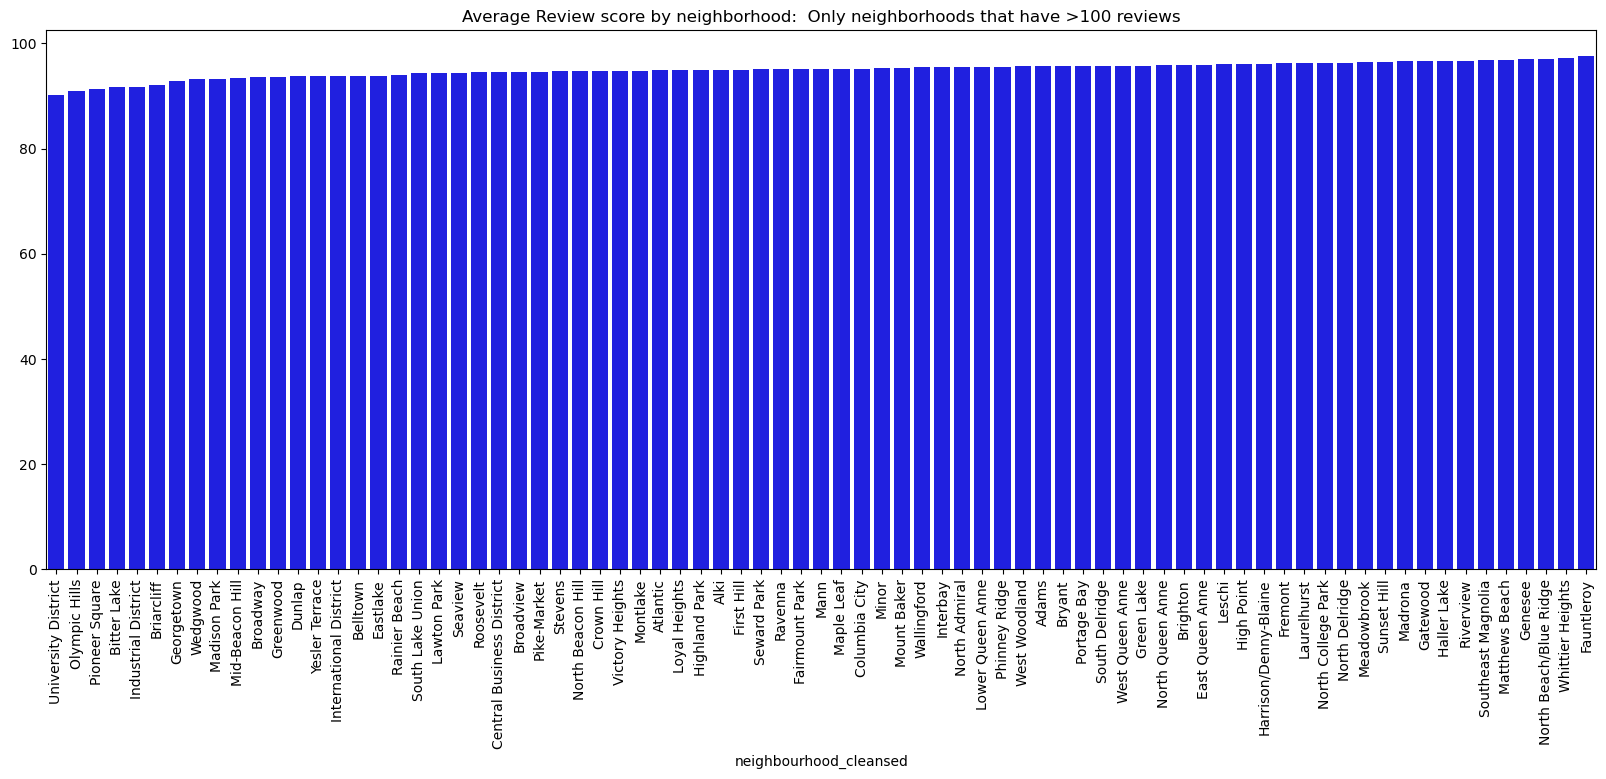

In [32]:
# Plot the data

plt.figure(figsize=(20,7))
sns.barplot(x=neighborhood_avg_review.index,
            y=neighborhood_avg_review.values,
            color='blue'
           );
plt.xticks(rotation=90);
plt.title('Average Review score by neighborhood:  Only neighborhoods that have >100 reviews');

## Second Business Question

Is it possible to determine which features are the most predictive when it comes to determining which Airbnbs are more popular (i.e. have the most stays).

The data does not have feature for number of stays, but it does have a feature for reviews per month.  It will be assumed that reviews per month can be thought of as an analogue to stays per month.  i.e. the more reviews a property has, it will be assumed also means the more stays that have occured at that location.  

A few things to consider here:
- There is a feature related to the availability of an Airbnb. However, the data does not discriminate between an Airbnb being unavailable due to the Owner not allowing a stay during that period vs the unit being unavailable do to it being rented for that period via Airbnb.  So this feature will not be used as part of the analysis.
- The fact that the reviews are displayed as reviews per month is helpful as it provides a way to normalize between units that have been listed for many years vs just a short time.
- However, some units are fairly new and may have not been listed long enough to generate enough data or stable review per month avg.  Therefore only units that have been listed for at least 3 months at the time the data was collected will be used for the analysis.
    - It can be seen in the describe_data function that the data was scraped on 1/4/2016.  Therefore to determine if a unit has been listed at least 3 months, the first review date has to be at least on or occuring before 10/4/2015.
- Only listings where reviews_per_month have data will be considered



In [73]:
# get listings that have been listed for at least 3 months as of the data being scraped
# use dataframe rpm (reviews per month) for this analysis

rpm = lst.loc[~lst['reviews_per_month'].isna()]
rpm = rpm.loc[rpm['first_review'] <= '2015-10-04']

In [164]:
# examine which feature still contain nan values in rpm

rpm.columns[rpm.isna().any()].tolist()

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee']

For rows that have null review_scores, fill them with the average for that neighborhood from lst

In [163]:
fill_avg(rpm, lst,'review_scores_rating', 'neighbourhood_cleansed')
fill_avg(rpm, lst,'review_scores_accuracy', 'neighbourhood_cleansed')
fill_avg(rpm, lst,'review_scores_cleanliness', 'neighbourhood_cleansed')
fill_avg(rpm, lst,'review_scores_checkin', 'neighbourhood_cleansed')
fill_avg(rpm, lst,'review_scores_communication', 'neighbourhood_cleansed')
fill_avg(rpm, lst,'review_scores_value', 'neighbourhood_cleansed')
fill_avg(rpm, lst,'review_scores_location', 'neighbourhood_cleansed')